David Díaz Paz y Puente | 650794
"Doy mi palabra que he realizado esta actividad con integridad académica."

# Proyecto Final – Unidad 1 

## 1) Planteamiento del problema y contexto de los datos

La pobreza en México constituye una problemática multidimensional y persistente. De acuerdo con el Consejo Nacional de Evaluación de la Política de Desarrollo Social (CONEVAL), una persona se encuentra en situación de pobreza cuando presenta al menos una carencia social (rezago educativo, acceso a servicios de salud, acceso a la seguridad social, calidad y espacios de la vivienda, servicios básicos en la vivienda y acceso a la alimentación) y, simultáneamente, su ingreso es insuficiente para adquirir los bienes y servicios necesarios para satisfacer sus necesidades alimentarias y no alimentarias (CONEVAL, s. f.). En el caso de la pobreza extrema, la condición se agrava al acumular un mayor número de carencias y contar con un ingreso tan reducido que, aún destinandolo por completo a la alimentación, no permitiría cubrir los requerimientos nutricionales mínimos para una vida saludable (CONEVAL, s. f.). <br>


En este contexto, el presente estudio propone el desarrollo de modelos de regresión orientados a estimar y analizar el ingreso trimestral per cápita de los hogares como una aproximación cuantitativa a su situación socioeconómica, a partir de las características y categorías asociadas a viviendas en México. De esta manera, se busca identificar en qué medida las condiciones estructurales, los servicios disponibles y la calidad habitacional se relacionan con el nivel de ingreso del hogar, permitiendo aproximar su posición dentro del espectro socioeconómico.<br>


El análisis se enfoca en Nuevo Leon, Mexico, durante 2024, y utiliza una base de datos construida a partir de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) del INEGI, integrando variables de vivienda y de ingreso mediante el identificador común de vivienda. En la práctica, el ingreso per cápita estimado se contrastará con umbrales oficiales de referencia definidos por CONEVAL para el ámbito urbano y rural, conocidos como Línea de Pobreza por Ingresos (LPI), que equivale al valor monetario total de la canasta alimentaria más la canasta no alimentaria por persona al mes, y Línea de Pobreza Extrema por Ingresos (LPEI), que equivale al valor monetario de la canasta alimentaria por persona al mes, lo cual permite interpretar los resultados del modelo en términos de vulnerabilidad económica. Para efectos de este trabajo se considera la LPI urbana mensual reportada por CONEVAL: 4,640.16 pesos (CONEVAL, 2025, p. 2). Convertida a una escala trimestral, multiplicamos el valor por 3, lo que resulta en 13,920.48 pesos. Este último será utilizado como punto de comparación para clasificar de manera operativa la situación por ingresos de los hogares dentro del conjunto de datos. <br> <br>

![Linea pobreza por ingreso](figuras/linea_pobreza_ingresos_coneval.png) <br>

_Figura 1. Valores monetarios mensuales por persona a pesos corrientes en México en la primera mitad del año 2024._ 

## 2) Exploración y comprension del dataset 

In [226]:
import pandas as pd
df = pd.read_csv('base_pobreza.csv')
diccionario = pd.read_csv('diccionario_datos.csv')
print(df.shape)

(3767, 31)


El dataframe (`df`) se compone de 3767 observaciones (filas) y 31 variables (columnas). 

In [227]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    3767 non-null   int64  
 1   tipo_viv    3767 non-null   object 
 2   mat_pared   3767 non-null   int64  
 3   mat_techos  3767 non-null   int64  
 4   mat_pisos   3767 non-null   int64  
 5   cocina      3767 non-null   int64  
 6   cocina_dor  3662 non-null   float64
 7   cuart_dorm  3767 non-null   int64  
 8   num_cuarto  3767 non-null   int64  
 9   lugar_coc   3767 non-null   int64  
 10  ab_agua     3538 non-null   float64
 11  dotac_agua  3538 non-null   float64
 12  excusado    3767 non-null   int64  
 13  uso_compar  3740 non-null   float64
 14  sanit_agua  3740 non-null   float64
 15  bano_comp   3767 non-null   object 
 16  bano_excus  3767 non-null   object 
 17  bano_regad  3767 non-null   object 
 18  drenaje     3767 non-null   int64  
 19  disp_elect  3767 non-null  

Cada fila representa una observacion identificada por `folioviv` (identificador de la vivienda). Las variables se enfocan en condiciones físicas de la vivienda (materiales de pared/techo/piso), servicios basicos (agua, drenaje, electricidad, sanitario, basura), características de ocupación (tenencia, escrituras), estructura del hogar (residentes totales y por sexo) y, finalmente, un bloque económico que sirve como objetivo para el modelo de pobreza: `ing_tri` (ingreso trimestral total) y `ing_tri_pc` (ingreso trimestral per capita).

En cuanto a tipos de dato, predominan variables int64 (18) que en este contexto representan códigos de catálogo (categorías numéricas; se explorarán a profundidad con el diccionario del conjunto), float64 (8) donde aparecen ingresos y también variables con faltantes, y object (5) son variables categóricas que se leyeron como texto (por ejemplo `tipo_viv`, `bano_comp`, `bano_excus`, `bano_regad`, `estim_pago`). Sobre la completitud, varias columnas presentan valores faltantes: `cocina_dor` tiene 105 nulos (3767-3662), `ab_agua` y `dotac_agua` tienen 229 nulos cada una (3767-3538), `uso_compar` y `sanit_agua` tienen 27 nulos cada una (3767-3740), y el caso mas relevante es `escrituras` con 943 nulos (3767-2824), es decir, alrededor de una cuarta parte del conjunto. 

Es importante mencionar que para la variable `estim_pago`, aunque parezca no tener huecos dentro de la base de datos, la realidad es que al ser de tipo object, pandas cuenta esas cadenas como “no nulas”, por eso df.info() te dice 3767 non-null aunque “visualmente” parezcan faltantes.

In [228]:
import numpy as np

df["estim_pago"] = df["estim_pago"].astype(str).str.strip()

# convertir vacios a NaN
df.loc[df["estim_pago"].eq(""), "estim_pago"] = np.nan

# convertir placeholders a NaN (ajusta la lista a lo que te salga en value_counts)
df["estim_pago"] = df["estim_pago"].replace(
    ["NA","N/A","NULL","null","None","nan","NaN","Sin dato","No sabe"],
    np.nan
)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    3767 non-null   int64  
 1   tipo_viv    3767 non-null   object 
 2   mat_pared   3767 non-null   int64  
 3   mat_techos  3767 non-null   int64  
 4   mat_pisos   3767 non-null   int64  
 5   cocina      3767 non-null   int64  
 6   cocina_dor  3662 non-null   float64
 7   cuart_dorm  3767 non-null   int64  
 8   num_cuarto  3767 non-null   int64  
 9   lugar_coc   3767 non-null   int64  
 10  ab_agua     3538 non-null   float64
 11  dotac_agua  3538 non-null   float64
 12  excusado    3767 non-null   int64  
 13  uso_compar  3740 non-null   float64
 14  sanit_agua  3740 non-null   float64
 15  bano_comp   3767 non-null   object 
 16  bano_excus  3767 non-null   object 
 17  bano_regad  3767 non-null   object 
 18  drenaje     3767 non-null   int64  
 19  disp_elect  3767 non-null  

Finalmente, contamos con una variable numérica adicional (`estim_pago`) que tiene 470 valores nulos (3767-3297). 

A continuación se presenta un diccionario que describe cada variable de manera contextual a la base de datos.

In [229]:
print(diccionario)

                          nombre_campo tipo    nemónico    catálogo  \
0         Identificador de la vivienda    C    folioviv         NaN   
1                     Tipo de vivienda    C    tipo_viv    tipo_viv   
2                  Material de paredes    C   mat_pared   mat_pared   
3                   Material de techos    C  mat_techos  mat_techos   
4                    Material de pisos    C   mat_pisos   mat_pisos   
5                         Tiene cocina    C      cocina       si_no   
6         Utiliza cocina de dormitorio    C  cocina_dor       si_no   
7                   Cuartos dormitorio    N  cuart_dorm         NaN   
8                    Número de cuartos    N  num_cuarto         NaN   
9                  Lugar donde cocinan    C   lugar_coc   lugar_coc   
10              Abastecimiento de agua    C     ab_agua     ab_agua   
11                    Dotación de agua    C  dotac_agua  dotac_agua   
12                      Tiene excusado    C    excusado    excusado   
13    

El diccionario describe un conjunto de 31 variables organizadas en torno a tres ejes principales: características físicas de la vivienda, disponibilidad de servicios básicos y condiciones socioeconomicas del hogar. A su vez, estas variables se clasifican en dos tipos de dato: C (categórico) y N (numérico).

La mayor parte de las variables se reporta como categórica (tipo C). Sin embargo, al observar la estructura de `df`, se identifica que una proporción importante de estas variables aparece almacenada con tipo int64. Esto es consistente con el uso de códigos numéricos para representar categorías, por lo que no deben interpretarse como valores continuos. En consecuencia, para una lectura adecuada del diccionario y para asegurar un tratamiento correcto en el análisis y en la modelación, es necesario complementar la interpretación mediante los catálogos asociados a cada variable, los cuales describen el significado de cada clave.

Con el fin de mantener el reporte conciso y evitar extensiones innecesarias, a continuación se presenta el acceso a los catálogos correspondientes a cada variable incluida en el estudio.

- [ab_agua](catalogos/ab_agua.csv)
- [combus](catalogos/combus.csv)
- [disp_elect](catalogos/disp_elect.csv)
- [dotac_agua](catalogos/dotac_agua.csv)
- [drenaje](catalogos/drenaje.csv)
- [eli_basura](catalogos/eli_basura.csv)
- [escrituras](catalogos/escrituras.csv)
- [est_socio](catalogos/est_socio.csv)
- [excusado](catalogos/excusado.csv)
- [lugar_coc](catalogos/lugar_coc.csv)
- [mat_pared](catalogos/mat_pared.csv)
- [mat_pisos](catalogos/mat_pisos.csv)
- [mat_techos](catalogos/mat_techos.csv)
- [sanit_agua](catalogos/sanit_agua.csv)
- [tenencia](catalogos/tenencia.csv)
- [tipo_viv](catalogos/tipo_viv.csv)

Los catálogos proporcionan la correspondencia entre las claves numéricas y el significado descriptivo de cada categoría, lo cual permite interpretar correctamente variables codificadas como valores enteros. Estos rangos varían según la variable; por ejemplo, `ab_agua` cuenta con siete opciones (1–7) que describen la fuente de abastecimiento: (1) servicio público de agua, (2) pozo comunitario, (3) pozo particular, (4) pipa, (5) otra vivienda, (6) lluvia y (7) otro lugar. 

In [230]:
print(df.head(5))

     folioviv tipo_viv  mat_pared  mat_techos  mat_pisos  cocina  cocina_dor  \
0  1906156202        2          8          10          2       1         2.0   
1  1906156203        2          8          10          2       1         2.0   
2  1906156204        1          8          10          3       1         2.0   
3  1906156407        1          8          10          2       1         2.0   
4  1906156408        1          7          10          3       1         2.0   

   cuart_dorm  num_cuarto  lugar_coc  ...  eli_basura  tenencia  estim_pago  \
0           2           4          1  ...           1         4        3000   
1           2           4          1  ...           1         1         NaN   
2           2           5          1  ...           1         4        3000   
3           1           3          1  ...           1         4        3000   
4           3           4          1  ...           1         1         NaN   

   escrituras  tot_resid tot_hom tot_muj est

Por último, tras revisar la estructura del dataframe, así como una muestra representativa de sus datos, es posible definir la metodología inicial que se seguirá para la limpieza y preparación de la información. Para esta etapa se identifican como principales retos del `df` la presencia de datos faltantes, la codificación numérica de variables categóricas y la existencia de valores atípicos (outliers), los cuales deberán abordarse de manera sistemática para garantizar la calidad del análisis y la validez de los modelos posteriores.

## 3) Preparación y tratamiento de datos 

### Problema A: valores faltantes

Recordando la completitud de los datos, las variables que presentan valores faltantes son las siguientes:

1. `uso_compar` y `sanit_agua` (27 nulos = 3767-3740) 
2. `cocina_dor` (105 nulos = 3767-3662)
3. `ab_agua` y `dotac_agua` (229 nulos = 3767-3538)
4. `estim_pago` (470 nulos = 3767-3297)
4. `escrituras` (943 nulos = 3767-2824)

A partir de esta información, surge la necesidad de implementar métodos de imputación acordes con la naturaleza de cada variable que presente valores faltantes. Se descarta la alternativa de eliminar observaciones, ya que ello implicaría una reducción significativa del tamaño muestral y podría introducir un sesgo de selección, al asumir implícitamente que la ausencia de datos es completamente aleatoria. 

In [231]:
print(diccionario.loc[[13, 14, 6, 10, 11, 23, 24]])

                    nombre_campo tipo    nemónico    catálogo   rango_claves
13  Uso compartido del sanitario    C  uso_compar       si_no          [1-2]
14       Sanitario conexión agua    C  sanit_agua  sanit_agua          [1-3]
6   Utiliza cocina de dormitorio    C  cocina_dor       si_no          [1-2]
10        Abastecimiento de agua    C     ab_agua     ab_agua          [1-7]
11              Dotación de agua    C  dotac_agua  dotac_agua          [1-5]
23  Estimación del pago de renta    N  estim_pago         NaN  [1-999999999]
24     Escrituras de la vivienda    C  escrituras  escrituras          [1-4]


Para variables categóricas con valores faltantes marginales se utilizará imputación por moda, dado su bajo impacto sobre la distribución. En el caso de `escrituras`, debido a la alta proporción de faltantes y a que su catálogo ya incluye la categoría “No sabe” (4), se generará una categoría adicional indicadora de faltas de respuesta (a partir de esto se crearán finalmente las variables dummy): 5; no respondio (NaN original). De este modo, se preserva la muestra completa y se permite al modelo capturar posibles patrones asociados a la no respuesta, reduciendo el riesgo de distorsión sistemática.

Para la variable numérica se realizará una imputación por mediana, debido tanto a la practicidad y a la robustez que ofrece este método ante valores atípicos (los cuales encontramos dentro de observaciones de esta variable).

In [232]:
## Imputacion por moda para variables marginales (no se toca 'escrituras' porque se tratara aparte)

# Columnas con NA (excluyendo 'escrituras' porque se tratara aparte)
na_cols = [c for c in df.columns if df[c].isna().any() and c != "escrituras" and c != "estim_pago"]

print("Columnas con NA (excepto escrituras):", na_cols)

for c in na_cols:
    mode_series = df[c].mode(dropna=True)
    if mode_series.empty:
        # Si por alguna razon no hay moda (columna vacia), se omite
        print(f"[WARN] {c}: no se encontro moda. Se omite.")
        continue
    
    mode_value = mode_series.iloc[0]
    df[c] = df[c].fillna(mode_value)

print("\nImputacion por moda aplicada a variables marginales.")

Columnas con NA (excepto escrituras): ['cocina_dor', 'ab_agua', 'dotac_agua', 'uso_compar', 'sanit_agua']

Imputacion por moda aplicada a variables marginales.


In [233]:
## Imputacion por valor fijo para 'escrituras' (categoría adicional: 5 = "No respondio (faltante original)")

df["escrituras"] = df["escrituras"].fillna(5)
print("\nImputacion por valor fijo aplicada a 'escrituras'.")


Imputacion por valor fijo aplicada a 'escrituras'.


In [234]:
## Imputación por mediana para estim_pago (si es numérica, si no se puede convertir a numérica se omite)

# Normaliza a string para limpiar
s = df["estim_pago"].astype(str).str.strip()

# Convierte placeholders comunes a NaN
placeholders = {"", "NA", "N/A", "NULL", "null", "None", "nan", "NaN", "Sin dato", "No sabe"}
s = s.replace(list(placeholders), np.nan)

# Convierte a numerico (lo que no se pueda se vuelve NaN)
df["estim_pago"] = pd.to_numeric(s, errors="coerce")

global_median = df["estim_pago"].median(skipna=True)

# Fallback final a mediana global
df["estim_pago"] = df["estim_pago"].fillna(global_median)

print(f"\nImputacion por mediana ({global_median}) aplicada a estim_pago.")


Imputacion por mediana (2500.0) aplicada a estim_pago.


In [235]:
## Resumen final

print("\n")
print(df.info())
print("\n")
print(df.head(5))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    3767 non-null   int64  
 1   tipo_viv    3767 non-null   object 
 2   mat_pared   3767 non-null   int64  
 3   mat_techos  3767 non-null   int64  
 4   mat_pisos   3767 non-null   int64  
 5   cocina      3767 non-null   int64  
 6   cocina_dor  3767 non-null   float64
 7   cuart_dorm  3767 non-null   int64  
 8   num_cuarto  3767 non-null   int64  
 9   lugar_coc   3767 non-null   int64  
 10  ab_agua     3767 non-null   float64
 11  dotac_agua  3767 non-null   float64
 12  excusado    3767 non-null   int64  
 13  uso_compar  3767 non-null   float64
 14  sanit_agua  3767 non-null   float64
 15  bano_comp   3767 non-null   object 
 16  bano_excus  3767 non-null   object 
 17  bano_regad  3767 non-null   object 
 18  drenaje     3767 non-null   int64  
 19  disp_elect  3767 non-null

Para resolver esta problemática, es necesario finalmente revisar el tipo de dato de `tipo_viv`, el cual se encuentra registrado como object. Esto se debe a que, dentro de dicha columna, se identificaron tres ocurrencias del carácter & en lugar de un valor numérico válido. Dado que el número de incongruencias es mínimo, se realizará una depuración puntual: se reemplazarán esas entradas por valores faltantes (NaN) y, posteriormente, se aplicará una imputación por moda para completar la información de la variable.

In [236]:
# 1) Limpiar el caracter raro
df["tipo_viv"] = df["tipo_viv"].astype(str).str.strip()
df.loc[df["tipo_viv"] == "&", "tipo_viv"] = np.nan   # convierte "&" a faltante real

# 2) Convertir de forma segura a entero categórico
df["tipo_viv"] = pd.to_numeric(df["tipo_viv"], errors="coerce").astype("Int64").astype("category")

# 3) Imputar por moda
if df["tipo_viv"].isna().any():
    moda = df["tipo_viv"].mode(dropna=True).iloc[0]
    df["tipo_viv"] = df["tipo_viv"].fillna(moda)

### Problema B: variables categóricas codificadas como números

Retomemos que la base de datos utilizada se compone, en su mayoría, de variables categóricas. Una fracción menor corresponde a categorías binarias (si/no), mientras que una parte sustantiva incluye variables con múltiples niveles, en algunos casos de hasta siete categorías. En consecuencia, al aplicar codificación mediante variables dummy (one-hot encoding), es esperable que el número de variables explicativas se incremente de forma significativa respecto a la estructura original del conjunto de datos.

In [237]:
cat_cols = [
    "tipo_viv", "mat_pared", "mat_techos", "mat_pisos", "lugar_coc",
    "ab_agua", "dotac_agua", "excusado", "sanit_agua", "drenaje",
    "disp_elect", "combus", "eli_basura", "tenencia"
]

# Asegurar que existan en el dataframe (por si alguna no esta)
cat_cols = [c for c in cat_cols if c in df.columns]

# 1) Diagnostico: encontrar valores "raros" no numericos
for c in cat_cols:
    s = df[c].astype(str).str.strip()
    # valores que NO son numeros (permitiendo vacio y NaN)
    bad_mask = ~s.str.match(r"^-?\d+(\.0+)?$") & ~s.isin(["nan", "NaN", "None", ""])  # tolera NaN/vacios
    if bad_mask.any():
        print(f"\n[WARN] Valores no numericos detectados en {c}:")
        print(s[bad_mask].value_counts().head(10))

# 2) Conversion segura: lo no numerico -> NaN
for c in cat_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64").astype("category")

# drop_first=True evita multicolinealidad en modelos lineales
df_dum = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Columnas originales:", df.shape[1])
print("Columnas despues de dummies:", df_dum.shape[1])
print("\nColumnas dummy creadas:")
print(df_dum.columns)


Columnas originales: 31
Columnas despues de dummies: 84

Columnas dummy creadas:
Index(['folioviv', 'cocina', 'cocina_dor', 'cuart_dorm', 'num_cuarto',
       'uso_compar', 'bano_comp', 'bano_excus', 'bano_regad', 'estim_pago',
       'escrituras', 'tot_resid', 'tot_hom', 'tot_muj', 'est_socio', 'ing_tri',
       'ing_tri_pc', 'tipo_viv_2', 'tipo_viv_3', 'tipo_viv_4', 'tipo_viv_5',
       'tipo_viv_7', 'mat_pared_2', 'mat_pared_3', 'mat_pared_4',
       'mat_pared_5', 'mat_pared_6', 'mat_pared_7', 'mat_pared_8',
       'mat_techos_2', 'mat_techos_3', 'mat_techos_4', 'mat_techos_5',
       'mat_techos_6', 'mat_techos_7', 'mat_techos_8', 'mat_techos_9',
       'mat_techos_10', 'mat_pisos_2', 'mat_pisos_3', 'lugar_coc_2',
       'lugar_coc_3', 'lugar_coc_4', 'lugar_coc_5', 'lugar_coc_6', 'ab_agua_2',
       'ab_agua_3', 'ab_agua_4', 'ab_agua_5', 'ab_agua_6', 'ab_agua_7',
       'dotac_agua_2', 'dotac_agua_3', 'dotac_agua_4', 'dotac_agua_5',
       'excusado_2', 'excusado_3', 'sanit_agua_2

Para más información sobre las categorías de las variables se recomienda revisar los catálogos presentados en la sección _2) Exploración y comprension del dataset_.

### Problema C: distribución sesgada y outliers en ingreso

En este contexto, un número reducido de observaciones con valores extremadamente altos (outliers) puede dominar el ajuste del modelo y distorsionar las estimaciones, incrementando la variabilidad del error y debilitando la interpretabilidad de los resultados. Por ello, es necesario aplicar estrategias de tratamiento que reduzcan la influencia de estos valores extremos y estabilicen la relación entre el ingreso y las variables explicativas.

In [238]:
COL = "ing_tri_pc" 

x = pd.to_numeric(df_dum[COL], errors="coerce")

print("\nTop 10 valores más altos:")
print(x.sort_values(ascending=False).head(10).to_string(index=False))

print("\nTop 10 valores más bajos:")
print(x.sort_values(ascending=True).head(10).to_string(index=False))



Top 10 valores más altos:
8686956.5150
 653736.2580
 574092.3840
 424599.5500
 392090.1625
 372502.1700
 340862.7675
 296796.1900
 294889.4500
 277868.8300

Top 10 valores más bajos:
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
  0.000000
146.735000
277.173333


Dado que los valores iguales a cero representan menos del 0.3% de la muestra (8 de 3767), no se consideran problemáticos ni influyen significativamente en la distribución, por lo tanto se optó por conservar dichos casos dentro del conjunto de datos.

Asimismo, las marcadas diferencias de magnitud entre los valores más altos y más bajos evidencian la conveniencia de aplicar una transformación o normalización de la variable de ingreso, con el fin de reducir la influencia de valores extremos y mejorar la estabilidad del análisis y del ajuste del modelo.

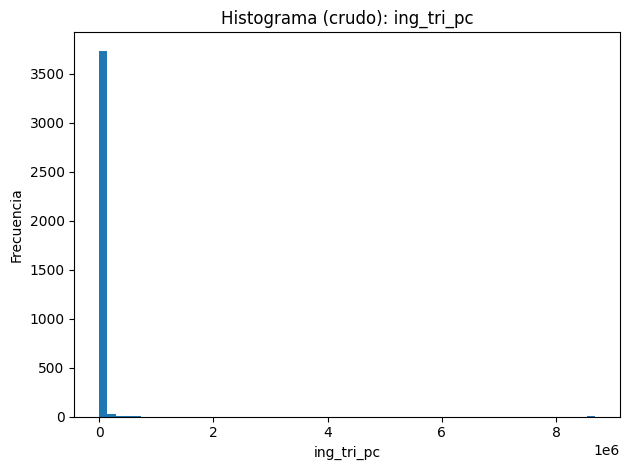

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

TARGET_COL = "ing_tri_pc"

y_raw = pd.to_numeric(df_dum[TARGET_COL], errors="coerce")
y = y_raw.dropna().copy()

plt.figure()
plt.hist(y, bins=60)
plt.title(f"Histograma (crudo): {TARGET_COL}")
plt.xlabel(TARGET_COL)
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


En los ingresos crudos (`ing_tri_pc`), la presencia de unos pocos valores extremadamente altos “estira” la gráfica, generando una distribución desequilibrada (asimétrica). En este sentido, la transformación `log1p` contribuye a comprimir los valores elevados y a reducir la asimetría, aproximando la forma de los datos a una distribución más cercana a una campana. Al aplicar logaritmo, los valores muy altos se comprimen (se acercan entre si), mientras que los valores bajos cambian menos.


=== TRANSFORMACIÓN log1p ===


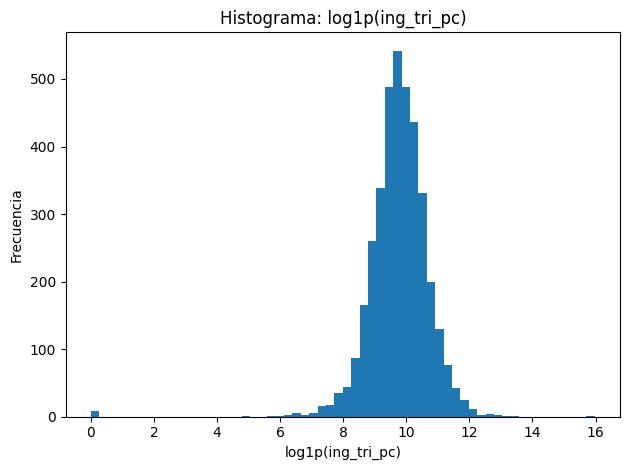

In [240]:
y_log = np.log1p(y)

print("\n=== TRANSFORMACIÓN log1p ===")
plt.figure()
plt.hist(y_log, bins=60)
plt.title(f"Histograma: log1p({TARGET_COL})")
plt.xlabel(f"log1p({TARGET_COL})")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

La transformación `log1p(ing_tri_pc)` consiste en aplicar un logaritmo natural al ingreso trimestral per cápita, pero sumando 1 antes de transformar: $log(1 + x)$. Se eligió esta transformación porque los ingresos suelen presentar una distribución fuertemente asimétrica con cola larga hacia la derecha: la mayoría de los hogares se concentra en valores relativamente bajos o medios, mientras que un número pequeño registra ingresos muy altos.

En terminos interpretativos, modelar `log1p(ing_tri_pc)` implica que los cambios en las variables explicativas se relacionan con cambios relativos (porcentuales) en el ingreso mas que con cambios absolutos, lo cual suele ser mas razonable en fenómenos económicos.


In [ ]:
# Almacenamos la variable transformada en el dataframe final (con NaN donde no se pudo calcular)
df_dum["y_log_ing_tri_pc"] = np.log1p(pd.to_numeric(df_dum[TARGET_COL], errors="coerce")).where(df_dum[TARGET_COL].notna(), np.nan)
print(df_dum["y_log_ing_tri_pc"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 3767 entries, 0 to 3766
Series name: y_log_ing_tri_pc
Non-Null Count  Dtype  
--------------  -----  
3767 non-null   float64
dtypes: float64(1)
memory usage: 29.6 KB
None


## 4) Selección de caracteristicas 

## 5) Construccion y comparacion de modelos (minimo 2: lineal y no lineal)

### A. Modelo lineal (para interpretacion)

### Modelo no lineal (para desempeño)

## 6) Evaluacion del desempeño

## 7) Inferencia y conclusiones

## 8) Referencias

CONEVAL. (n.d.). Glosario. https://www.coneval.org.mx/Medicion/Paginas/Glosario.aspx

Consejo Nacional de Evaluacion de la Politica de Desarrollo Social. (2025, 13 de enero). Lineas de pobreza por ingresos, diciembre 2024 [Informe]. https://www.coneval.org.mx

CONEVAL. (n.d.). Líneas de Pobreza por Ingresos Serie 1992-2024. https://www.coneval.org.mx/Medicion/MP/Paginas/Lineas_Pobreza_Ingresos_Serie_1992-2024.aspx